In [1]:
# !pip install --upgrade tensorflow-probability

In [3]:
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

plt.rcParams.update({'font.size': 22})
tfd = tfp.distributions

In [4]:
def create_dataset(n, x_range):
    x_uniform_dist = tfd.Uniform(low=x_range[0], high=x_range[1])
    x = x_uniform_dist.sample(n).numpy() [:, np.newaxis] 
    y_true = 2.7*x+3
    eps_uniform_dist = tfd.Normal(loc=0, scale=1)
    eps = eps_uniform_dist.sample(n).numpy() [:, np.newaxis] *0.74*x
    y = y_true + eps
    return x, y, y_true

In [5]:
x_train, y_train, y_true = create_dataset(2000, [-10, 10])
x_val, y_val, _ = create_dataset(500, [-10, 10])

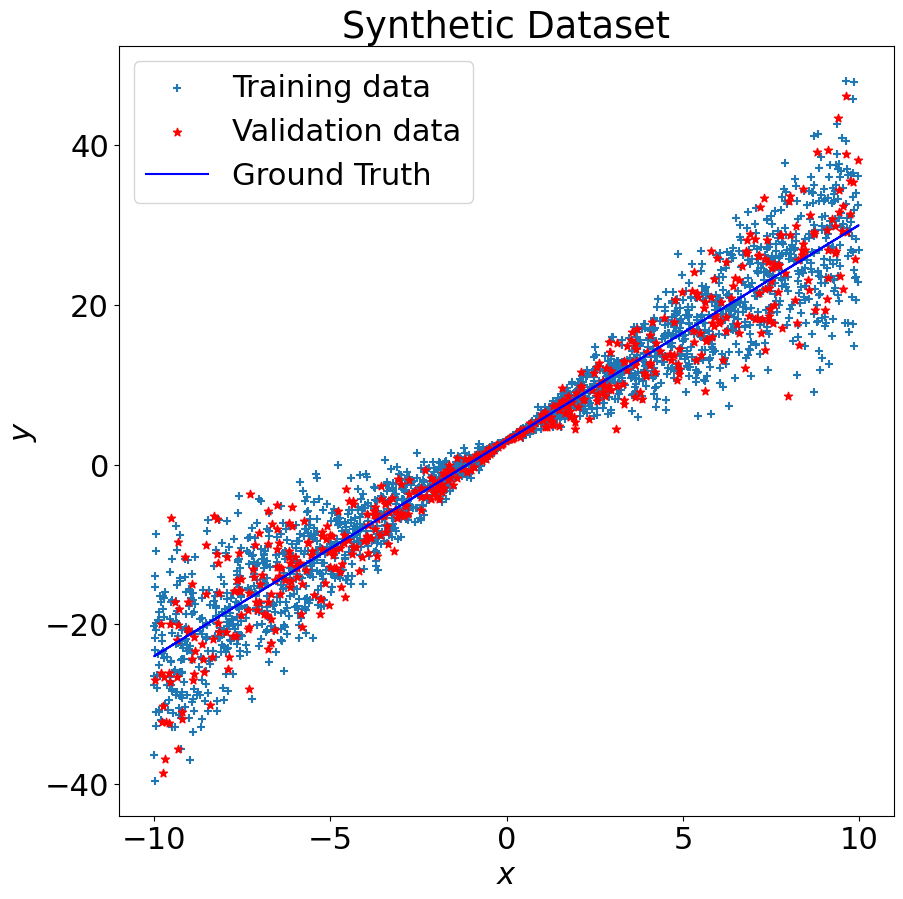

In [6]:
def plot_dataset(x_train, y_train, x_val, y_val, y_true, title):
    fig = plt.figure(figsize = (10, 10))
    plt.scatter(x_train, y_train, marker='+', label='Training data')
    plt.scatter(x_val, y_val, marker='*', color='r', label='Validation data')
    plt.plot(x_train, y_true, color='b', label='Ground Truth')
    plt.title(title)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()

plot_dataset(x_train, y_train, x_val, y_val, y_true, 'Synthetic Dataset')

In [7]:
x_test = np.linspace(-10, 10, 1000).reshape(-1, 1)

In [8]:
# Model Architecture
model = Sequential([Dense(1, input_shape=(1,))])

# Compile 
model.compile(loss='mse', optimizer='adam')

# Fit
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 128.0551
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 120.7476
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 113.8145
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 107.2271
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 100.9926
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 95.0883
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 89.5096
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 84.2416
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 79.2931
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 74.6166
Epoch 11/100
63/63 [==============================] - 0s 3ms/step - loss: 70.2181
Epoch 12/100
63/63 [==============================] - 0s 2ms/step - loss: 66.0815
Epoch 13/100
63/63 [

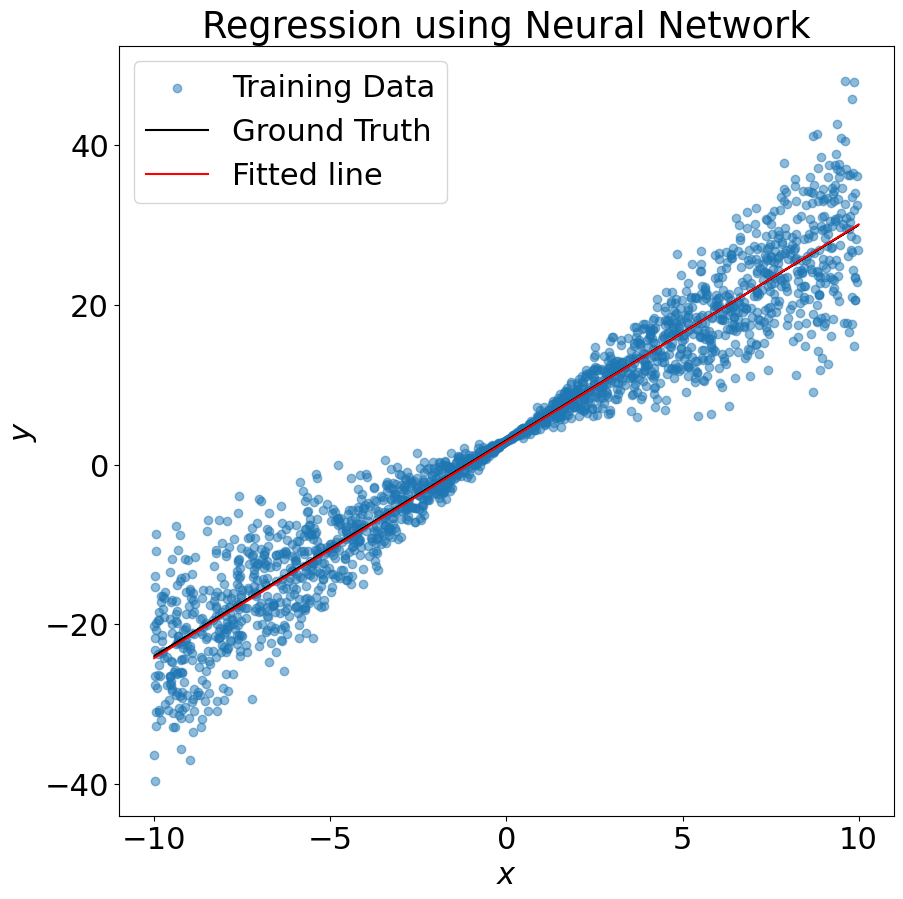

In [9]:
y_pred = model(x_test)

# Plot the data and a trained regression line
plt.figure(figsize=(10, 10))
plt.scatter(x_train, y_train, alpha=.5, label='Training Data')
plt.plot(x_train, y_true, color='k', label='Ground Truth')
plt.plot(x_test, y_pred, label='Fitted line', c='r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Regression using Neural Network')
plt.legend()
plt.show()

In [10]:
model = Sequential([Dense(2, input_shape = (1,)),
    tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[..., :1], scale=0.3+tf.math.abs(t[...,1:])))
])

In [11]:
# Define negative loglikelihood loss function
def neg_loglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [12]:
model.compile(loss=neg_loglik, optimizer='adam')

# Fit
model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
63/63 [==============================] - 1s 3ms/step - loss: 69.2294
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 50.1749
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 40.0735
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 33.6969
Epoch 5/500
63/63 [==============================] - 0s 2ms/step - loss: 29.2347
Epoch 6/500
63/63 [==============================] - 0s 2ms/step - loss: 25.9086
Epoch 7/500
63/63 [==============================] - 0s 3ms/step - loss: 23.3166
Epoch 8/500
63/63 [==============================] - 0s 2ms/step - loss: 21.2351
Epoch 9/500
63/63 [==============================] - 0s 2ms/step - loss: 19.5232
Epoch 10/500
63/63 [==============================] - 0s 2ms/step - loss: 18.0882
Epoch 11/500
63/63 [==============================] - 0s 3ms/step - loss: 16.8638
Epoch 12/500
63/63 [==============================] - 0s 2ms/step - loss: 15.8058
Epoch 13/500
63/63 [=====

Epoch 102/500
63/63 [==============================] - 0s 2ms/step - loss: 2.9385
Epoch 103/500
63/63 [==============================] - 0s 2ms/step - loss: 2.9233
Epoch 104/500
63/63 [==============================] - 0s 2ms/step - loss: 2.9086
Epoch 105/500
63/63 [==============================] - 0s 2ms/step - loss: 2.8943
Epoch 106/500
63/63 [==============================] - 0s 3ms/step - loss: 2.8804
Epoch 107/500
63/63 [==============================] - 0s 3ms/step - loss: 2.8670
Epoch 108/500
63/63 [==============================] - 0s 3ms/step - loss: 2.8539
Epoch 109/500
63/63 [==============================] - 0s 3ms/step - loss: 2.8411
Epoch 110/500
63/63 [==============================] - 0s 3ms/step - loss: 2.8287
Epoch 111/500
63/63 [==============================] - 0s 3ms/step - loss: 2.8166
Epoch 112/500
63/63 [==============================] - 0s 3ms/step - loss: 2.8049
Epoch 113/500
63/63 [==============================] - 0s 3ms/step - loss: 2.7934
Epoch 114/500
63

63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 202/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 203/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4666
Epoch 204/500
63/63 [==============================] - 0s 5ms/step - loss: 2.4666
Epoch 205/500
63/63 [==============================] - 0s 4ms/step - loss: 2.4666
Epoch 206/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4665
Epoch 207/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 208/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 209/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 210/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 211/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 212/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 213/500
63/63 [=========

63/63 [==============================] - 0s 2ms/step - loss: 2.4668
Epoch 302/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 303/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 304/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 305/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 306/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 307/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 308/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 309/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 310/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4668
Epoch 311/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 312/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4667
Epoch 313/500
63/63 [=========

63/63 [==============================] - 0s 4ms/step - loss: 2.4667
Epoch 402/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4666
Epoch 403/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4667
Epoch 404/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4666
Epoch 405/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4666
Epoch 406/500
63/63 [==============================] - 0s 2ms/step - loss: 2.4666
Epoch 407/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4666
Epoch 408/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4667
Epoch 409/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4666
Epoch 410/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4668
Epoch 411/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4667
Epoch 412/500
63/63 [==============================] - 0s 3ms/step - loss: 2.4667
Epoch 413/500
63/63 [=========

In [13]:
# Summary Statistics
y_mean = model(x_test).mean()
y_std = model(x_test).stddev()

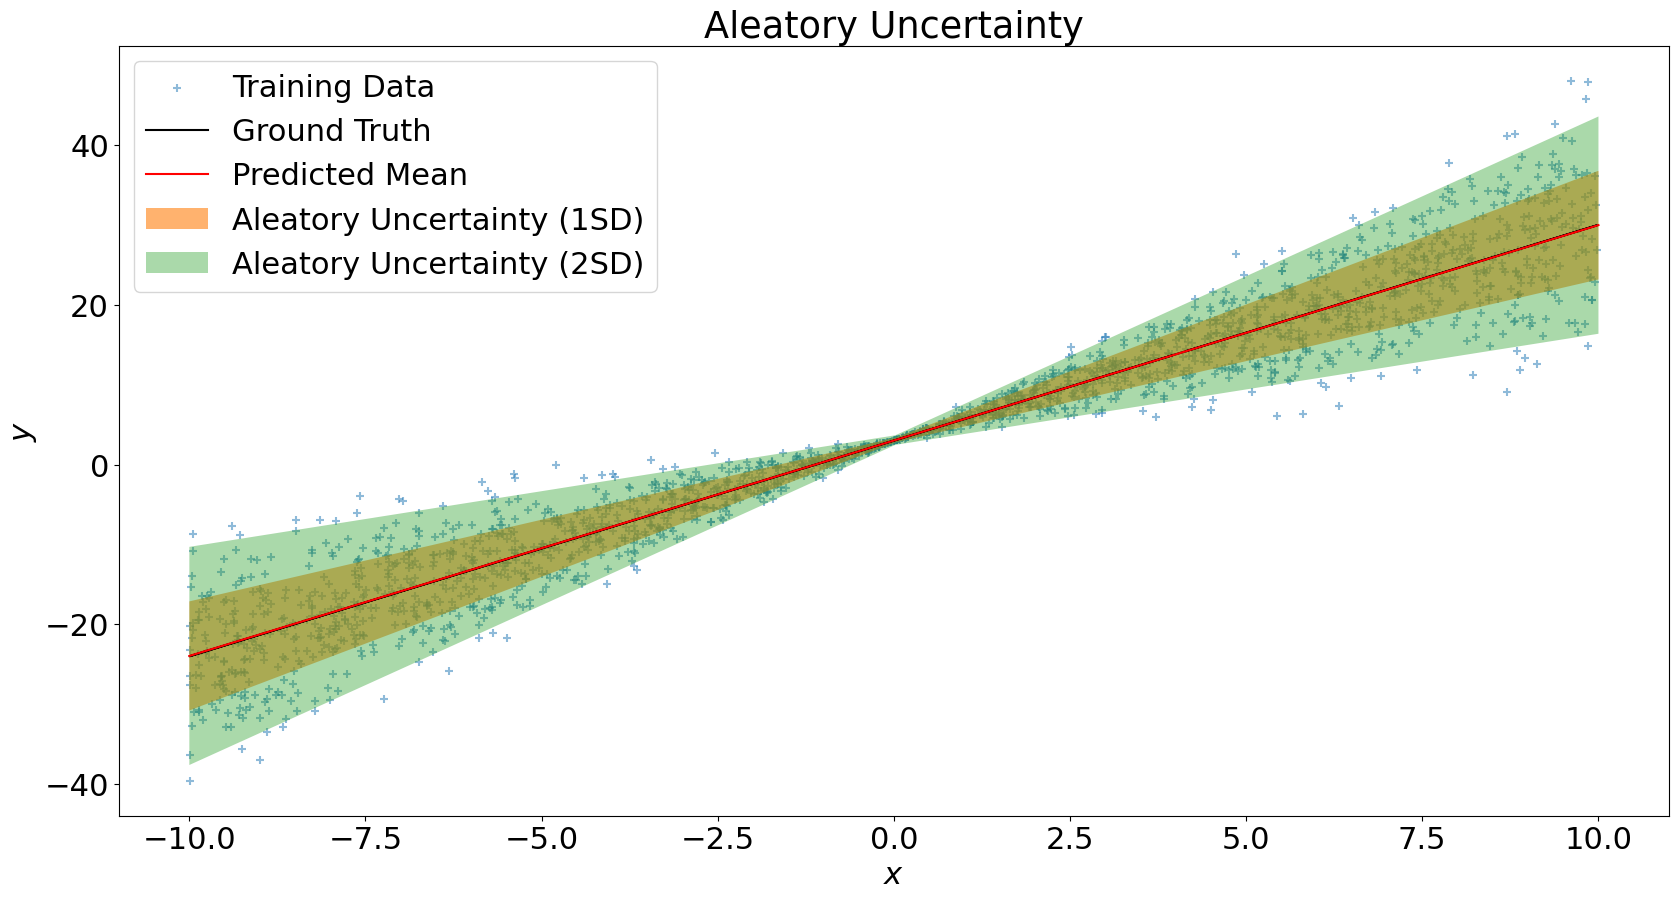

In [14]:
fig = plt.figure(figsize = (20, 10))
plt.scatter(x_train, y_train, marker='+', label='Training Data', alpha=0.5)
plt.plot(x_train, y_true, color='k', label='Ground Truth')
plt.plot(x_test, y_mean, color='r', label='Predicted Mean')
plt.fill_between(np.squeeze(x_test), np.squeeze(y_mean+1*y_std), np.squeeze(y_mean-1*y_std),  alpha=0.6, label='Aleatory Uncertainty (1SD)')
plt.fill_between(np.squeeze(x_test), np.squeeze(y_mean+2*y_std), np.squeeze(y_mean-2*y_std),  alpha=0.4, label='Aleatory Uncertainty (2SD)')
plt.title('Aleatory Uncertainty')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()